In [2]:
%matplotlib inline

import os

import matplotlib.pyplot as plt
import shapefile

#from helpers import slug
from mpl_toolkits.basemap import Basemap


In [3]:
def slug(s):
    return re.sub(' ', '_', s)
s = "Test Test    Test"

print (s,slug(s))


Test Test    Test Test_Test____Test


In [1]:
import re

re_non_word = re.compile(r'\W+')

print (re_non_word)

def slug(s):
    return re.sub(re_non_word, '_', s).lower()
    #return re.sub(re_non_word, '-', s).lower()

re.compile('\\W+')


-74.50099725584383 40.344999987396676 -73.22600106986815 41.09699978114807 -73.86349916285599 40.72099988427237
CPU times: user 35 s, sys: 2.52 s, total: 37.5 s
Wall time: 37.3 s


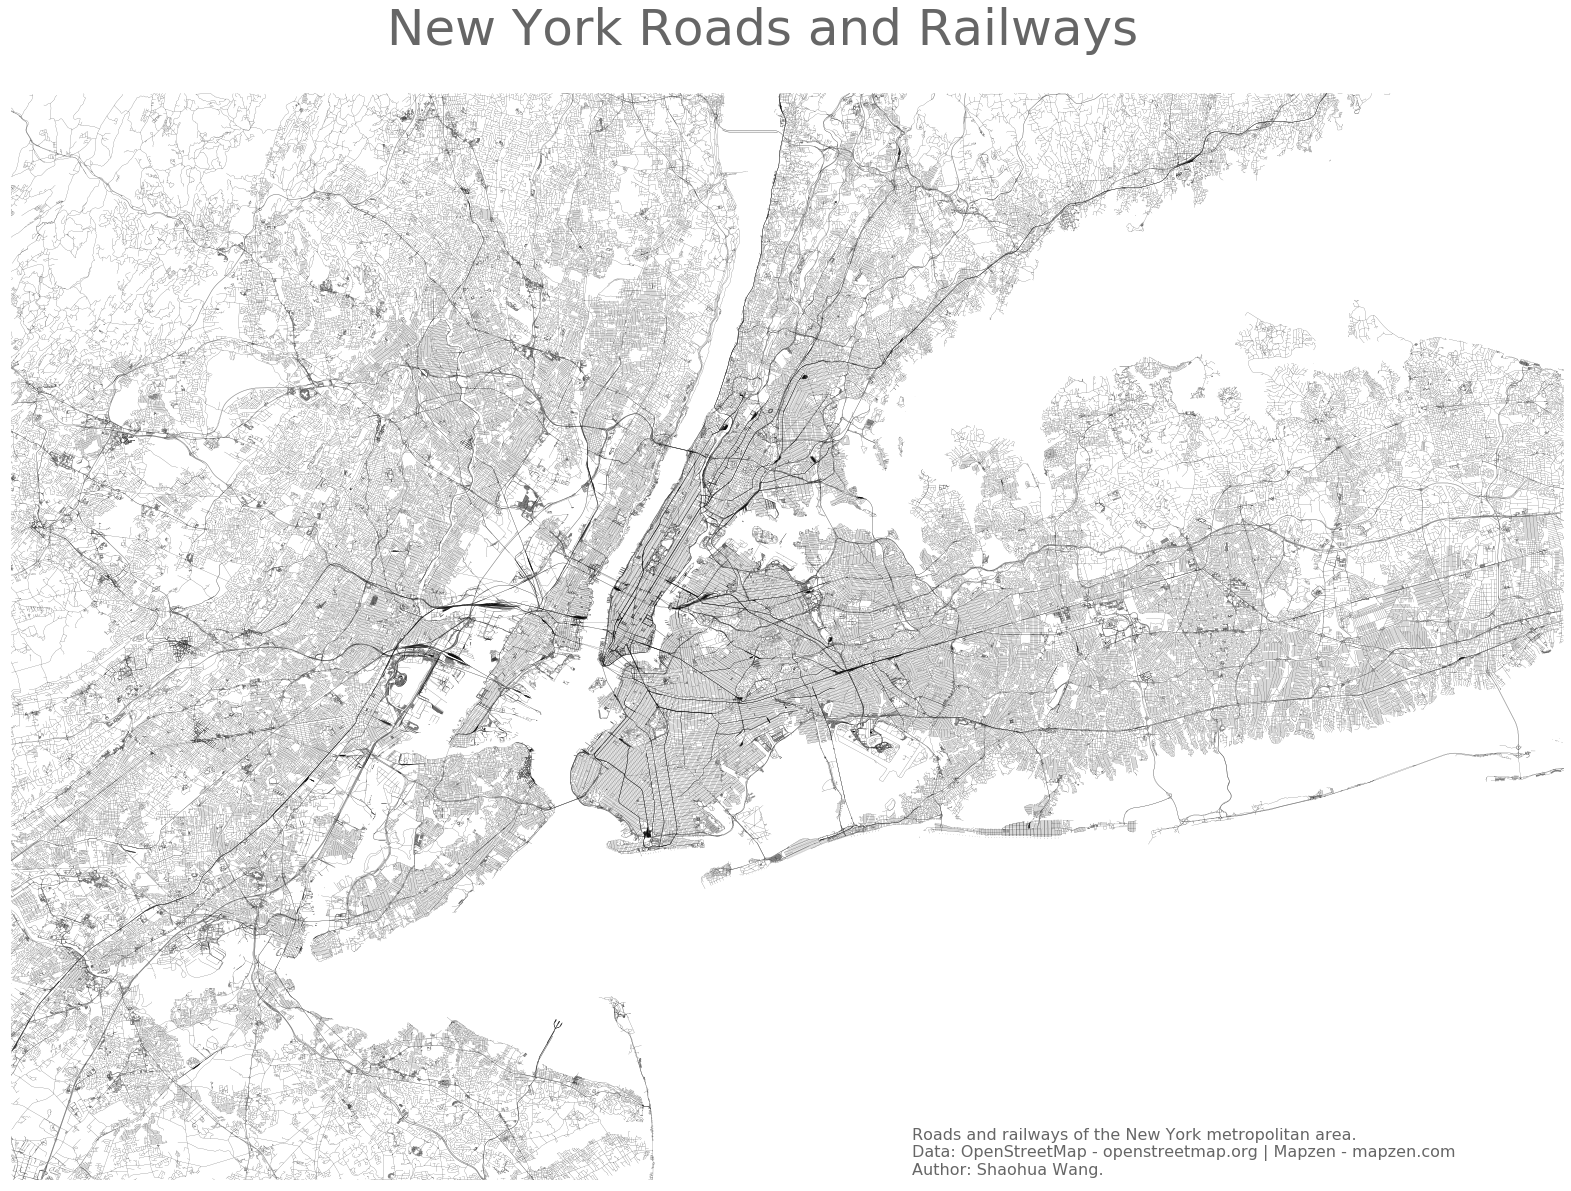

In [5]:
%%time

#cp -r data/*_osm_roads.* osmdata/
#rm -r data/*_osm_* 

city = 'Tehran'
roadname = "tehran_iran_osm_roads"

city = 'Rome'
roadname = "rome_italy_osm_roads"

city = 'Seattle'
roadname = "seattle_washington_osm_roads"

city = 'Berlin'
roadname = "berlin_germany_osm_roads"

city = 'Madrid'
roadname = "madrid_spain_osm_roads"

city = 'Paris'
roadname = "paris_france_osm_roads"

city = 'New York'
roadname = "new-york_new-york_osm_roads"


title = '{} Roads and Railways'.format(city)
#title = 'Chicago Roads and Railways'
description = 'Roads and railways of the {} metropolitan area.\nData: OpenStreetMap - openstreetmap.org | Mapzen - mapzen.com\nAuthor: Shaohua Wang.'.format(city)
#description = 'Roads and railways of the Chicago metropolitan area.\nData: OpenStreetMap - openstreetmap.org | Mapzen - mapzen.com\nAuthor: Shaohua Wang.' #- shaohua@illinois.edu

imgfile = './img/{}.png'.format(slug(title))
#imgfile = './img/{}.png'.format((title))
#shpfile = os.path.expanduser('./data/tehran_iran_osm_roads')
shpfile = os.path.expanduser('./osmdata/{}'.format(roadname))
#shpfile = os.path.expanduser('./chicago/chicago_illinois_osm_roads')
fontcolor='#666666'

fig = plt.figure(figsize=(28, 20))
#ax = fig.add_subplot(111, axisbg='w', frame_on=False)
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.suptitle(title, fontsize=50, y=.94, color=fontcolor)

sf = shapefile.Reader(shpfile)


x0, y0 ,x1, y1 = sf.bbox

#print (sf.bbox)
cx, cy = (x0 + x1) / 2, (y0 + y1) / 2
print (x0, y0 ,x1, y1,cx, cy)

m = Basemap(llcrnrlon=x0, llcrnrlat=y0, urcrnrlon=x1, urcrnrlat=y1, lat_0=cy, lon_0=cx, resolution='c', projection='mill')
#m = Basemap(llcrnrlon=y0, llcrnrlat=x0, urcrnrlon=y1, urcrnrlat=x1, lat_0=cy, lon_0=cx, resolution='h', projection='mill')

# Avoid border around map.
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

m.readshapefile(shpfile, 'metro', linewidth=.15)
#plt.annotate(description, xy=(.008, 0.005), size=16, xycoords='axes fraction', color=fontcolor)
#plt.annotate(description, xy=(.58, 0.905), size=16, xycoords='axes fraction', color=fontcolor)
plt.annotate(description, xy=(.58, 0.005), size=16, xycoords='axes fraction', color=fontcolor)
plt.savefig(imgfile, bbox_inches='tight', pad_inches=.2)

In [6]:
sf

In [7]:
%%time
import geopandas as gpd
gdata = gpd.read_file('./osmdata/{}.shp'.format(roadname))
gdata.head()

CPU times: user 14.3 s, sys: 4.49 s, total: 18.8 s
Wall time: 20.4 s


,id,osm_id,type,name,tunnel,bridge,oneway,ref,z_order,access,service,class,geometry
0,1,4758650.0,motorway,None,0,0,1,I 287,9,None,None,highway,"LINESTRING (-74.43881 40.83210, -74.43953 40.8..."
1,2,5029221.0,primary,Boerum Place,0,0,1,None,6,None,None,highway,"LINESTRING (-73.98922 40.69097, -73.98901 40.6..."
2,3,5052897.0,primary,South Street,0,0,0,CR 601,6,yes,None,highway,"LINESTRING (-74.46982 40.78706, -74.47054 40.7..."
3,4,5052919.0,primary,Madison Avenue,0,0,0,NJ 124,6,yes,None,highway,"LINESTRING (-74.47236 40.78895, -74.47070 40.7..."
4,5,5052941.0,primary,South Street,0,0,1,NJ 124,6,None,None,highway,"LINESTRING (-74.48136 40.79654, -74.48124 40.7..."


In [8]:
print (len(gdata))

279516
